**Will do 3 projects using ANN:**

**1. Binary Classification**

**2. Multiclass Classification**

**3. Regression**

#**Binary Classification**

**Churn Prediction**

In [317]:
import numpy as np
import pandas as pd

In [318]:
df=pd.read_csv('/content/Churn.csv')

In [319]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [320]:
df.shape

(10000, 11)

In [321]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [322]:
df.drop_duplicates(inplace=True)

In [323]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [324]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [325]:
X = df.drop(columns=['Exited'])
y = df['Exited']

**spliting the data**

In [326]:
from sklearn.model_selection import train_test_split

In [327]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

**Scaling the dataset**

In [328]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

**importing the necessary libraries**

In [329]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

**Define the Model Architecture**

In [331]:
model = create_model()

In [332]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_96 (Dense)            (None, 32)                384       
                                                                 
 batch_normalization_65 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dropout_65 (Dropout)        (None, 32)                0         
                                                                 
 dense_97 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_66 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dropout_66 (Dropout)        (None, 16)              

**Compile the model**

In [333]:
model.compile(optimizer=Adam(learning_rate=0.01),loss="binary_crossentropy",
              metrics=["accuracy"])

**Call backs for early stopping and learning rate reduction**

In [334]:
early_stopping = EarlyStopping(monitor="val_loss",patience=10,restore_best_weights=True,verbose=1)
reduce_lr = ReduceLROnPlateau(monitor="val_loss",patience=5,verbose=1)

**Train the model**

In [335]:
history=model.fit(X_train_scaled,y_train,epochs=15,
          batch_size=25,
          validation_split=0.2,
          callbacks=[early_stopping,reduce_lr],
          verbose=1)

Epoch 1/15
256/256 [==============================] - 4s 5ms/step - loss: 0.5247 - accuracy: 0.7659 - val_loss: 0.4197 - val_accuracy: 0.8112 - lr: 0.0100
Epoch 2/15
256/256 [==============================] - 1s 3ms/step - loss: 0.4540 - accuracy: 0.8003 - val_loss: 0.3990 - val_accuracy: 0.8263 - lr: 0.0100
Epoch 3/15
256/256 [==============================] - 1s 3ms/step - loss: 0.4373 - accuracy: 0.7991 - val_loss: 0.3844 - val_accuracy: 0.8331 - lr: 0.0100
Epoch 4/15
256/256 [==============================] - 1s 4ms/step - loss: 0.4249 - accuracy: 0.8092 - val_loss: 0.3814 - val_accuracy: 0.8319 - lr: 0.0100
Epoch 5/15
256/256 [==============================] - 1s 3ms/step - loss: 0.4227 - accuracy: 0.8105 - val_loss: 0.3719 - val_accuracy: 0.8462 - lr: 0.0100
Epoch 6/15
256/256 [==============================] - 1s 4ms/step - loss: 0.4153 - accuracy: 0.8159 - val_loss: 0.3618 - val_accuracy: 0.8544 - lr: 0.0100
Epoch 7/15
256/256 [==============================] - 1s 4ms/step - lo

In [336]:
#Evaluate the model
loss,accuracy = model.evaluate(X_test_scaled,y_test)
print(f"Loss: {loss*100:.2f}")
print(f"Test Accuracy: {accuracy*100:.2f}")

63/63 [==============================] - 0s 2ms/step - loss: 0.3470 - accuracy: 0.8565
Loss: 34.70
Test Accuracy: 85.65


In [337]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [338]:
# Predict on the testing data
y_pred = np.where(model.predict(X_test_scaled)>0.5,1,0)
print(accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

63/63 [==============================] - 0s 2ms/step
85.65
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.80      0.36      0.50       393

    accuracy                           0.86      2000
   macro avg       0.83      0.67      0.71      2000
weighted avg       0.85      0.86      0.83      2000



array([[1572,   35],
       [ 252,  141]])

**plotting accuracy and loss**

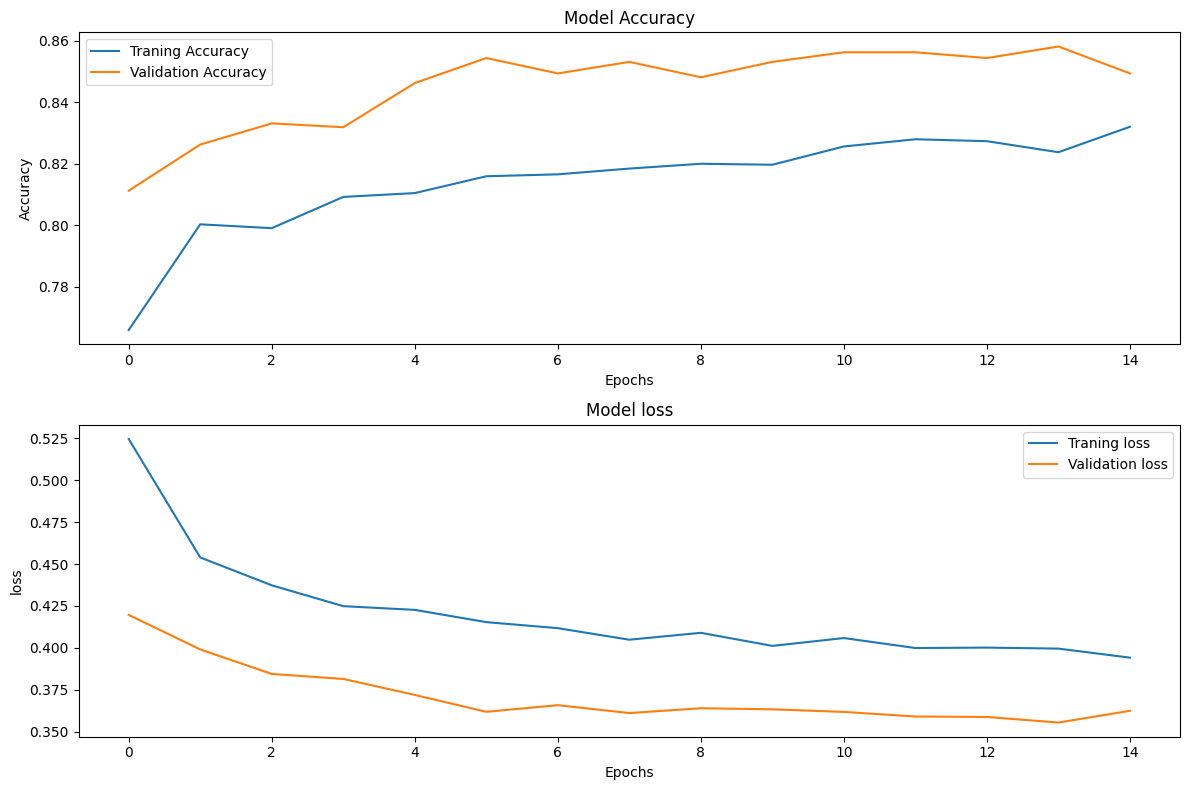

In [339]:
plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
plt.plot(history.history["accuracy"],label="Traning Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.history["loss"],label="Traning loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

plt.tight_layout()
plt.show()

#**MultiClass Classification Problem using ANN**

**MNIST Dataset**

**Will use MNIST dataset here we have:**

1. 70k images
2. Each image shape is 28*28 i.e 784 pixels for every image

**Input layer** ==> 784 nodes [one node for each pixel] => i.e. each pixel will have one input node
weights & biases ==> 784 * 128 + 128

**Hidden Layer** ==> 128 nodes
weights & biases ==> 128 * 10 + 10

**Output layer** ==> 10 nodes ==> i.e. one node for each class say from 0 to 9 <== multiclass classification problem

In [340]:
from tensorflow import keras

In [341]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

In [342]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

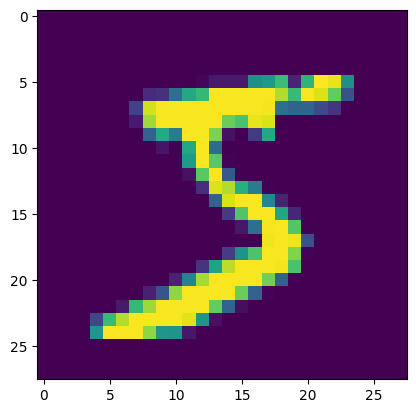

In [343]:
plt.imshow(x_train[0])
plt.show()

AIM is to make a NN that will understand based on pixels values which digit is in given image
See above arrays they have values ranging from 0-255 which need to be grounded to a range of 0-1 Why??

It will help NN to converge faster i.e learn weights and biases fast
Lets divide all values with 255

In [344]:
x_train = x_train / 255
x_test = x_test / 255

In [345]:
from tensorflow.keras.layers import Flatten

In [346]:
model = Sequential()

model.add(Flatten(input_shape=(28,28))) #changing 28*28 to 784 nodes
model.add(Dense(128,activation='relu')) #no need to given number of input as Flatten output will become input bydefault
model.add(Dense(10,activation='softmax'))

In [347]:
model.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_13 (Flatten)        (None, 784)               0         
                                                                 
 dense_100 (Dense)           (None, 128)               100480    
                                                                 
 dense_101 (Dense)           (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [348]:
#model compilation
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

#train model
hist = model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2847 - accuracy: 0.9194 - val_loss: 0.1566 - val_accuracy: 0.9546
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1290 - accuracy: 0.9616 - val_loss: 0.1113 - val_accuracy: 0.9657
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0876 - accuracy: 0.9737 - val_loss: 0.1125 - val_accuracy: 0.9648
Epoch 4/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0672 - accuracy: 0.9807 - val_loss: 0.0937 - val_accuracy: 0.9713
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0505 - accuracy: 0.9846 - val_loss: 0.0858 - val_accuracy: 0.9747
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0386 - accuracy: 0.9883 - val_loss: 0.0856 - val_accuracy: 0.9761
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0321 - accuracy: 0.9899 - val_loss: 0.1110 - val_accuracy:

**in sparse_categorical_crossentropy ==> no need to one-hot encode labels i.e. 0 to 9
in categorical_crossentropy ==> need to one-hot encode labels i.e. 0 to 9**

In [349]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


It is giving probability for different number from 0 to 9
Aim to find out which number is the given input off, so :

take out max value index position out of above array

In [350]:
y_pred = y_prob.argmax(axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [351]:
accuracy_score(y_test,y_pred)*100

97.81

In [352]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.99      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.97      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [353]:
confusion_matrix(y_test,y_pred)

array([[ 959,    0,    7,    0,    2,    3,    3,    1,    4,    1],
       [   0, 1123,    3,    1,    0,    1,    2,    1,    4,    0],
       [   1,    1, 1017,    1,    0,    0,    1,    6,    4,    1],
       [   0,    0,    6,  985,    0,    6,    0,    3,    6,    4],
       [   1,    0,    8,    0,  958,    0,    0,    2,    0,   13],
       [   2,    0,    0,    6,    1,  874,    3,    1,    3,    2],
       [   3,    3,    6,    1,    5,    4,  932,    0,    3,    1],
       [   1,    4,   11,    1,    0,    0,    0, 1006,    1,    4],
       [   0,    0,    5,    3,    3,    1,    1,    7,  949,    5],
       [   2,    3,    2,    6,    5,    5,    1,    5,    2,  978]])

#**3. Regression problem using ANN**

In [372]:
data= pd.read_csv('/content/admission_data.csv')

In [373]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [374]:
data.shape

(500, 8)

In [375]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [386]:
x = data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [387]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=108)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((400, 7), (400,), (100, 7), (100,))

In [388]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

X_train= scale.fit_transform(X_train) #scaled np array
X_test = scale.transform(X_test)   #scaled np array

In [389]:
 model1 = Sequential()

model1.add(Dense(7,activation='relu',input_dim=7))
model1.add(Dense(7,activation='relu'))
model1.add(Dense(1,activation='linear')) #as this is Regression problem

In [390]:
model1.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_114 (Dense)           (None, 7)                 56        
                                                                 
 dense_115 (Dense)           (None, 7)                 56        
                                                                 
 dense_116 (Dense)           (None, 1)                 8         
                                                                 
Total params: 120 (480.00 Byte)
Trainable params: 120 (480.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [397]:
model1.compile(loss='mean_squared_error',optimizer='Adam')

hist = model1.fit(X_train,y_train,epochs=30,validation_split=0.2)

#prediction
y_pred = model1.predict(X_test)

from sklearn.metrics import r2_score

r2_score(y_test,y_pred)*100

Epoch 1/30
10/10 [==============================] - 1s 22ms/step - loss: 0.0112 - val_loss: 0.0102
Epoch 2/30
10/10 [==============================] - 0s 7ms/step - loss: 0.0106 - val_loss: 0.0099
Epoch 3/30
10/10 [==============================] - 0s 8ms/step - loss: 0.0101 - val_loss: 0.0099
Epoch 4/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0094 - val_loss: 0.0091
Epoch 5/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0092 - val_loss: 0.0089
Epoch 6/30
10/10 [==============================] - 0s 7ms/step - loss: 0.0088 - val_loss: 0.0090
Epoch 7/30
10/10 [==============================] - 0s 8ms/step - loss: 0.0085 - val_loss: 0.0085
Epoch 8/30
10/10 [==============================] - 0s 8ms/step - loss: 0.0082 - val_loss: 0.0085
Epoch 9/30
10/10 [==============================] - 0s 8ms/step - loss: 0.0080 - val_loss: 0.0083
Epoch 10/30
10/10 [==============================] - 0s 5ms/step - loss: 0.0078 - val_loss: 0.0080
Epoch 11/30
10/10 

65.15248798322328

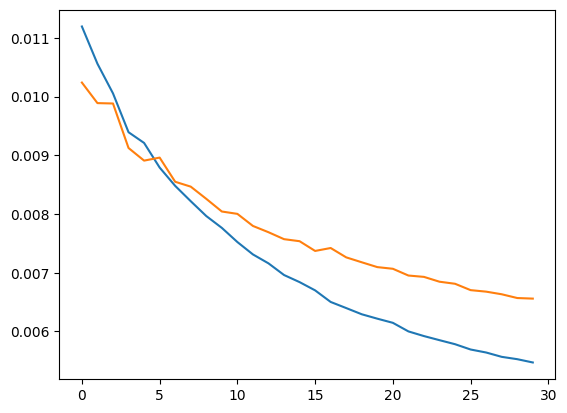

In [398]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()